In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from niwidgets import NiftiWidget
import tensorflow as tf
from tensorflow.keras.preprocessing.image import * 
from tensorflow import keras
from config import *
from modelIO import *
from model import *
from display import *
from dataAugmentation import *
from classification import *
import math
import random
from skimage.util import montage, crop
from tensorflow.python.client import device_lib
from tensorflow.keras.metrics import MeanIoU,BinaryCrossentropy,Accuracy,Precision,Recall
from skimage.transform import rescale, resize, downscale_local_mean,rotate
from skimage import data, color
from scipy import ndimage
from scipy import misc
from numpy import fliplr
from PIL import Image
from datetime import *
from sklearn.model_selection import KFold
#print(device_lib.list_local_devices())
#tf.config.experimental.list_physical_devices('GPU')

/home/jain0000/miniconda3/envs/segment2/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
input_arr1=[]
input_arr2_mask=[]
input_arr3=[]
input_arr4=[]
input_arr2_class=[]
for y in ['mandible-Right-Molar/iteration1','mandible-Right-Canine/iteration3','maxilla-Right-Molar/iteration1']:
    for t in os.listdir(os.path.join(data_dir_train+str('image'))):
        if y.find(t) != -1:
            d = dataset(y,'train')
            x_train=d[0]
            y_train_class=d[2]
            y_train_mask=d[1]
            input_arr1.append(x_train)
            input_arr2_mask.append(y_train_mask)
            input_arr2_class.append(y_train_class)
            
print(np.array(input_arr2_mask).shape)
print(np.array(input_arr2_class).shape)

for t in os.listdir(os.path.join(data_dir_test+str('image'))):
    d = dataset(t,'test')
    #print(d[2])
   # display_monatage(d[0][0],d[1][0])
    x_train=d[0]
    y_train=d[1]
    input_arr3.append(x_train)
    input_arr4.append(y_train)

mandible-Right-Molar/iteration1
mandible-Right-Molar/iteration1
mandible-Right-Molar/iteration1
mandible-Right-Molar/iteration1
mandible-Right-Molar/iteration1
mandible-Right-Canine/iteration3
mandible-Right-Canine/iteration3
mandible-Right-Canine/iteration3
mandible-Right-Canine/iteration3
mandible-Right-Canine/iteration3
maxilla-Right-Molar/iteration1
maxilla-Right-Molar/iteration1
maxilla-Right-Molar/iteration1
maxilla-Right-Molar/iteration1
maxilla-Right-Molar/iteration1
(3, 5, 40, 40, 40)
(3, 5)
mandible-Right-Canine
mandible-Right-Molar
maxilla-Left-Canine
mandible-Right-Premolar
maxilla-Right-Canine
mandible-Left-Molar
maxilla-Left-Premolar
maxilla-Left-Incisor
mandible-Left-Incisor
mandible-Right-Incisor
maxilla-Right-Premolar
maxilla-Left-Molar
maxilla-Right-Incisor
mandible-Left-Premolar
maxilla-Right-Molar
mandible-Left-Canine


In [42]:
fold_no = 1  
score=[]
models =[]
val=[]

name  = '-'.join(['UNET3D-Tooth','classification',str(IMAGE_HEIGHT),str(IMAGE_WIDTH),str(IMAGE_DEPTH),datetime.now().strftime("%Y%m%d-%H%M%S"),'.h5'])   
logdir = LOG_PATH + name

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

inputs_train = np.array(input_arr1)
target_train = np.array(input_arr2_mask)
target_train_class =np.array(input_arr2_class)
inputs_val = np.array(input_arr3)
target_val = np.array(input_arr4)

inputsAll=tf.expand_dims(np.concatenate((inputs_train),axis=0), axis=4)
target=tf.expand_dims(np.concatenate((target_train),axis=0), axis=4)
classLabel =np.concatenate((target_train_class),axis=0)
print(inputsAll.shape,target.shape,classLabel.shape)
      

(15, 40, 40, 40, 1) (15, 40, 40, 40, 1) (15,)


In [43]:
def train_preprocessing(volume, label,classLabel):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    #if DATA_AUG==True:
   #     volume,label = data_aug(volume,label)
    
    volume = tf.expand_dims(volume, axis=3)
    label = tf.expand_dims(tf.math.round(label), axis=3)
    classLabel = tf.expand_dims(classLabel, axis=0)
    return volume,label,classLabel


def _fixup_shape(images, labels,classLabel):
    images.set_shape([None,None,None,None])
    labels.set_shape([None,None,None,None]) # I have 19 classes
    classLabel.set_shape([None])
    return images, labels,classLabel

train_loader = tf.data.Dataset.from_tensor_slices((inputsAll, target,classLabel))
#validation_loader = tf.data.Dataset.from_tensor_slices((inputs_val,target_val,classLabel))
    
train_dataset = (
train_loader
.map(train_preprocessing)
.map(_fixup_shape)
.batch(30)  
.prefetch(30)
)
# Only rescale.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity 

ValueError: Shapes must be equal rank, but are 5 and 4

In [33]:
#print(np.expand_dims(np.array(np.concatenate((im),axis=0)),4).shape)

model= get_model('segmentation_and_classification')
model.summary()

Model: "UNET3D-L4-F32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 40, 40, 40,  0                                            
__________________________________________________________________________________________________
conv3d_15 (Conv3D)              (None, 40, 40, 40, 3 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 40, 40, 40, 3 128         conv3d_15[0][0]                  
__________________________________________________________________________________________________
tf_op_layer_Relu_15 (TensorFlow [(None, 40, 40, 40,  0           batch_normalization_18[0][0]     
______________________________________________________________________________________

In [44]:
loss_fn =  Dice()
loss= keras.losses.SparseCategoricalCrossentropy()
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        0.001, decay_steps=100, decay_rate=0.9, staircase=True)
loss_value = 9.0    
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
loss=[loss_fn,loss],
optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
metrics=['accuracy'],
)

epochs = NUM_OF_EPOCHS
print(inputsAll.shape)
model.fit(
    x=inputsAll, y=(target,classLabel),
    epochs=epochs,
    )
# Iterate over the batches of a dataset.
#for epoch in range(300):    
    # Iterate over the batches of a dataset.        
   # for (i,m,l) in (train_dataset):
   #     with tf.GradientTape() as tape:
   #         inputs = np.array(i)
            #print(inputs.shape)
   #         targets = np.array(m)
   #         t = np.array(l)
   #         predictions = model(inputs)
            
   #         loss_value = tf.reduce_sum(loss_fn(targets,predictions[0])  + loss(t,predictions[1]))
   #         tape.watch(loss_value)
   #         gradients = tape.gradient(loss_value, model.trainable_weights)
            #print(gradients)
   #         optimizer.apply_gradients(zip(gradients, model.trainable_weights))
   #         print("Epoch:", epoch)                 
   #         print("Loss:", float(loss_value))
            

    

(15, 40, 40, 40, 1)
Epoch 1/2000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 2ms/step - loss: 1.7963 - sigmoid_loss: 0.2599 - dense_7_loss: 1.5364 - sigmoid_accuracy: 0.2861 - dense_7_accuracy: 0.2667
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.6918 - sigmoid_loss: 0.1889 - dense_7_loss: 1.5030 - sigmoid_accuracy: 0.5949 - dense_7_accuracy: 0.3333
Epoch 3/20

1/1 [==============================] - 0s 4ms/step - loss: 0.6854 - sigmoid_loss: 0.0140 - dense_7_loss: 0.6713 - sigmoid_accuracy: 0.9895 - dense_7_accuracy: 0.8667
Epoch 87/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6806 - sigmoid_loss: 0.0137 - dense_7_loss: 0.6668 - sigmoid_accuracy: 0.9900 - dense_7_accuracy: 0.8667
Epoch 88/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6767 - sigmoid_loss: 0.0137 - dense_7_loss: 0.6629 - sigmoid_accuracy: 0.9892 - dense_7_accuracy: 0.8667
Epoch 89/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6722 - sigmoid_loss: 0.0135 - dense_7_loss: 0.6588 - sigmoid_accuracy: 0.9901 - dense_7_accuracy: 0.8667
Epoch 90/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6681 - sigmoid_loss: 0.0133 - dense_7_loss: 0.6548 - sigmoid_accuracy: 0.9903 - dense_7_accuracy: 0.8667
Epoch 91/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6640 - sigmoid_loss: 0.0132 - dense_7_l

1/1 [==============================] - 0s 1ms/step - loss: 0.4241 - sigmoid_loss: 0.0063 - dense_7_loss: 0.4178 - sigmoid_accuracy: 0.9944 - dense_7_accuracy: 0.8667
Epoch 177/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4220 - sigmoid_loss: 0.0062 - dense_7_loss: 0.4157 - sigmoid_accuracy: 0.9948 - dense_7_accuracy: 0.8667
Epoch 178/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4205 - sigmoid_loss: 0.0064 - dense_7_loss: 0.4141 - sigmoid_accuracy: 0.9937 - dense_7_accuracy: 0.8667
Epoch 179/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4186 - sigmoid_loss: 0.0062 - dense_7_loss: 0.4124 - sigmoid_accuracy: 0.9946 - dense_7_accuracy: 0.8667
Epoch 180/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4163 - sigmoid_loss: 0.0060 - dense_7_loss: 0.4103 - sigmoid_accuracy: 0.9952 - dense_7_accuracy: 0.8667
Epoch 181/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4142 - sigmoid_loss: 0.0061 - dens

1/1 [==============================] - 0s 2ms/step - loss: 0.3005 - sigmoid_loss: 0.0037 - dense_7_loss: 0.2967 - sigmoid_accuracy: 0.9970 - dense_7_accuracy: 0.8667
Epoch 267/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2994 - sigmoid_loss: 0.0038 - dense_7_loss: 0.2956 - sigmoid_accuracy: 0.9962 - dense_7_accuracy: 0.8667
Epoch 268/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2972 - sigmoid_loss: 0.0037 - dense_7_loss: 0.2934 - sigmoid_accuracy: 0.9969 - dense_7_accuracy: 0.8667
Epoch 269/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2651 - sigmoid_loss: 0.0042 - dense_7_loss: 0.2610 - sigmoid_accuracy: 0.9950 - dense_7_accuracy: 0.9333
Epoch 270/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2673 - sigmoid_loss: 0.0042 - dense_7_loss: 0.2630 - sigmoid_accuracy: 0.9948 - dense_7_accuracy: 0.9333
Epoch 271/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2636 - sigmoid_loss: 0.0043 - dens

1/1 [==============================] - 0s 1ms/step - loss: 0.1084 - sigmoid_loss: 0.0029 - dense_7_loss: 0.1055 - sigmoid_accuracy: 0.9965 - dense_7_accuracy: 1.0000
Epoch 357/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - sigmoid_loss: 0.0029 - dense_7_loss: 0.1045 - sigmoid_accuracy: 0.9969 - dense_7_accuracy: 1.0000
Epoch 358/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1065 - sigmoid_loss: 0.0028 - dense_7_loss: 0.1037 - sigmoid_accuracy: 0.9968 - dense_7_accuracy: 1.0000
Epoch 359/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1057 - sigmoid_loss: 0.0029 - dense_7_loss: 0.1029 - sigmoid_accuracy: 0.9967 - dense_7_accuracy: 1.0000
Epoch 360/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1048 - sigmoid_loss: 0.0030 - dense_7_loss: 0.1019 - sigmoid_accuracy: 0.9964 - dense_7_accuracy: 1.0000
Epoch 361/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1038 - sigmoid_loss: 0.0031 - dens

1/1 [==============================] - 0s 1ms/step - loss: 0.0532 - sigmoid_loss: 0.0019 - dense_7_loss: 0.0512 - sigmoid_accuracy: 0.9985 - dense_7_accuracy: 1.0000
Epoch 447/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0528 - sigmoid_loss: 0.0019 - dense_7_loss: 0.0509 - sigmoid_accuracy: 0.9985 - dense_7_accuracy: 1.0000
Epoch 448/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0525 - sigmoid_loss: 0.0019 - dense_7_loss: 0.0506 - sigmoid_accuracy: 0.9984 - dense_7_accuracy: 1.0000
Epoch 449/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0522 - sigmoid_loss: 0.0019 - dense_7_loss: 0.0503 - sigmoid_accuracy: 0.9987 - dense_7_accuracy: 1.0000
Epoch 450/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0519 - sigmoid_loss: 0.0019 - dense_7_loss: 0.0500 - sigmoid_accuracy: 0.9984 - dense_7_accuracy: 1.0000
Epoch 451/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0516 - sigmoid_loss: 0.0019 - dens

1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - sigmoid_loss: 0.0014 - dense_7_loss: 0.0323 - sigmoid_accuracy: 0.9992 - dense_7_accuracy: 1.0000
Epoch 537/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0335 - sigmoid_loss: 0.0014 - dense_7_loss: 0.0321 - sigmoid_accuracy: 0.9991 - dense_7_accuracy: 1.0000
Epoch 538/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0334 - sigmoid_loss: 0.0014 - dense_7_loss: 0.0320 - sigmoid_accuracy: 0.9991 - dense_7_accuracy: 1.0000
Epoch 539/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0332 - sigmoid_loss: 0.0014 - dense_7_loss: 0.0318 - sigmoid_accuracy: 0.9992 - dense_7_accuracy: 1.0000
Epoch 540/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0331 - sigmoid_loss: 0.0014 - dense_7_loss: 0.0317 - sigmoid_accuracy: 0.9991 - dense_7_accuracy: 1.0000
Epoch 541/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0329 - sigmoid_loss: 0.0014 - dens

1/1 [==============================] - 0s 1ms/step - loss: 0.0238 - sigmoid_loss: 0.0010 - dense_7_loss: 0.0228 - sigmoid_accuracy: 0.9997 - dense_7_accuracy: 1.0000
Epoch 627/2000
1/1 [==============================] - 0s 971us/step - loss: 0.0237 - sigmoid_loss: 0.0010 - dense_7_loss: 0.0227 - sigmoid_accuracy: 0.9997 - dense_7_accuracy: 1.0000
Epoch 628/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0236 - sigmoid_loss: 0.0010 - dense_7_loss: 0.0226 - sigmoid_accuracy: 0.9997 - dense_7_accuracy: 1.0000
Epoch 629/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0235 - sigmoid_loss: 0.0010 - dense_7_loss: 0.0225 - sigmoid_accuracy: 0.9997 - dense_7_accuracy: 1.0000
Epoch 630/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0235 - sigmoid_loss: 9.9922e-04 - dense_7_loss: 0.0225 - sigmoid_accuracy: 0.9997 - dense_7_accuracy: 1.0000
Epoch 631/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0234 - sigmoid_loss: 9.9384e

1/1 [==============================] - 0s 1ms/step - loss: 0.0181 - sigmoid_loss: 7.7495e-04 - dense_7_loss: 0.0174 - sigmoid_accuracy: 0.9998 - dense_7_accuracy: 1.0000
Epoch 715/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0181 - sigmoid_loss: 7.6968e-04 - dense_7_loss: 0.0173 - sigmoid_accuracy: 0.9998 - dense_7_accuracy: 1.0000
Epoch 716/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0180 - sigmoid_loss: 7.6510e-04 - dense_7_loss: 0.0173 - sigmoid_accuracy: 0.9998 - dense_7_accuracy: 1.0000
Epoch 717/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0180 - sigmoid_loss: 7.6262e-04 - dense_7_loss: 0.0172 - sigmoid_accuracy: 0.9998 - dense_7_accuracy: 1.0000
Epoch 718/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0179 - sigmoid_loss: 7.6188e-04 - dense_7_loss: 0.0172 - sigmoid_accuracy: 0.9998 - dense_7_accuracy: 1.0000
Epoch 719/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - sigmoid

1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - sigmoid_loss: 6.1951e-04 - dense_7_loss: 0.0139 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 803/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - sigmoid_loss: 6.1797e-04 - dense_7_loss: 0.0138 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 804/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0144 - sigmoid_loss: 6.1580e-04 - dense_7_loss: 0.0138 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 805/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0144 - sigmoid_loss: 6.1422e-04 - dense_7_loss: 0.0138 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 806/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0144 - sigmoid_loss: 6.1236e-04 - dense_7_loss: 0.0137 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 807/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0143 - sigmoid

1/1 [==============================] - 0s 2ms/step - loss: 0.0120 - sigmoid_loss: 5.0399e-04 - dense_7_loss: 0.0115 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 891/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0120 - sigmoid_loss: 5.0294e-04 - dense_7_loss: 0.0115 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 892/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0120 - sigmoid_loss: 5.0188e-04 - dense_7_loss: 0.0115 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 893/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119 - sigmoid_loss: 5.0084e-04 - dense_7_loss: 0.0114 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 894/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119 - sigmoid_loss: 4.9979e-04 - dense_7_loss: 0.0114 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 895/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119 - sigmoid

1/1 [==============================] - 0s 1ms/step - loss: 0.0102 - sigmoid_loss: 4.2935e-04 - dense_7_loss: 0.0098 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 979/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0102 - sigmoid_loss: 4.2862e-04 - dense_7_loss: 0.0098 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 980/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0102 - sigmoid_loss: 4.2790e-04 - dense_7_loss: 0.0098 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 981/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0102 - sigmoid_loss: 4.2721e-04 - dense_7_loss: 0.0097 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 982/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - sigmoid_loss: 4.2657e-04 - dense_7_loss: 0.0097 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 983/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - sigmoid

1/1 [==============================] - 0s 3ms/step - loss: 0.0088 - sigmoid_loss: 3.7437e-04 - dense_7_loss: 0.0084 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1067/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0087 - sigmoid_loss: 3.7377e-04 - dense_7_loss: 0.0084 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1068/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0087 - sigmoid_loss: 3.7317e-04 - dense_7_loss: 0.0084 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1069/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0087 - sigmoid_loss: 3.7257e-04 - dense_7_loss: 0.0083 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1070/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0087 - sigmoid_loss: 3.7197e-04 - dense_7_loss: 0.0083 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1071/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0087 - si

1/1 [==============================] - 0s 1ms/step - loss: 0.0077 - sigmoid_loss: 3.2917e-04 - dense_7_loss: 0.0073 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1155/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0077 - sigmoid_loss: 3.2874e-04 - dense_7_loss: 0.0073 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1156/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0077 - sigmoid_loss: 3.2832e-04 - dense_7_loss: 0.0073 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1157/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0076 - sigmoid_loss: 3.2789e-04 - dense_7_loss: 0.0073 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1158/2000
1/1 [==============================] - 0s 988us/step - loss: 0.0076 - sigmoid_loss: 3.2747e-04 - dense_7_loss: 0.0073 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1159/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0076 - 

1/1 [==============================] - 0s 1ms/step - loss: 0.0069 - sigmoid_loss: 2.9732e-04 - dense_7_loss: 0.0066 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1243/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069 - sigmoid_loss: 2.9701e-04 - dense_7_loss: 0.0066 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1244/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069 - sigmoid_loss: 2.9670e-04 - dense_7_loss: 0.0066 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1245/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0068 - sigmoid_loss: 2.9640e-04 - dense_7_loss: 0.0066 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1246/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - sigmoid_loss: 2.9610e-04 - dense_7_loss: 0.0065 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1247/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - si

1/1 [==============================] - 0s 1ms/step - loss: 0.0062 - sigmoid_loss: 2.7258e-04 - dense_7_loss: 0.0060 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1331/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062 - sigmoid_loss: 2.7234e-04 - dense_7_loss: 0.0060 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1332/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062 - sigmoid_loss: 2.7209e-04 - dense_7_loss: 0.0059 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1333/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062 - sigmoid_loss: 2.7184e-04 - dense_7_loss: 0.0059 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1334/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0062 - sigmoid_loss: 2.7159e-04 - dense_7_loss: 0.0059 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1335/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062 - si

1/1 [==============================] - 0s 1ms/step - loss: 0.0057 - sigmoid_loss: 2.5068e-04 - dense_7_loss: 0.0054 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1419/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - sigmoid_loss: 2.5048e-04 - dense_7_loss: 0.0054 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1420/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - sigmoid_loss: 2.5028e-04 - dense_7_loss: 0.0054 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1421/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - sigmoid_loss: 2.5008e-04 - dense_7_loss: 0.0054 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1422/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0057 - sigmoid_loss: 2.4988e-04 - dense_7_loss: 0.0054 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1423/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - si

1/1 [==============================] - 0s 1ms/step - loss: 0.0053 - sigmoid_loss: 2.3258e-04 - dense_7_loss: 0.0050 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1507/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0053 - sigmoid_loss: 2.3240e-04 - dense_7_loss: 0.0050 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1508/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - sigmoid_loss: 2.3222e-04 - dense_7_loss: 0.0050 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1509/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0052 - sigmoid_loss: 2.3205e-04 - dense_7_loss: 0.0050 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1510/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - sigmoid_loss: 2.3189e-04 - dense_7_loss: 0.0050 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1511/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - si

1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - sigmoid_loss: 2.1845e-04 - dense_7_loss: 0.0047 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1595/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - sigmoid_loss: 2.1830e-04 - dense_7_loss: 0.0047 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1596/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - sigmoid_loss: 2.1815e-04 - dense_7_loss: 0.0047 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1597/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - sigmoid_loss: 2.1801e-04 - dense_7_loss: 0.0047 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1598/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - sigmoid_loss: 2.1786e-04 - dense_7_loss: 0.0047 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1599/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049 - si

1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - sigmoid_loss: 2.0607e-04 - dense_7_loss: 0.0044 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1683/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - sigmoid_loss: 2.0588e-04 - dense_7_loss: 0.0044 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1684/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - sigmoid_loss: 2.0571e-04 - dense_7_loss: 0.0044 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1685/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0046 - sigmoid_loss: 2.0554e-04 - dense_7_loss: 0.0044 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1686/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0046 - sigmoid_loss: 2.0538e-04 - dense_7_loss: 0.0044 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1687/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0046 - si

1/1 [==============================] - 0s 1ms/step - loss: 0.0043 - sigmoid_loss: 1.9528e-04 - dense_7_loss: 0.0041 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1771/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0043 - sigmoid_loss: 1.9517e-04 - dense_7_loss: 0.0041 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1772/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043 - sigmoid_loss: 1.9506e-04 - dense_7_loss: 0.0041 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1773/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043 - sigmoid_loss: 1.9496e-04 - dense_7_loss: 0.0041 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1774/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043 - sigmoid_loss: 1.9485e-04 - dense_7_loss: 0.0041 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1775/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043 - si

1/1 [==============================] - 0s 1ms/step - loss: 0.0041 - sigmoid_loss: 1.8645e-04 - dense_7_loss: 0.0039 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1859/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041 - sigmoid_loss: 1.8636e-04 - dense_7_loss: 0.0039 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1860/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041 - sigmoid_loss: 1.8626e-04 - dense_7_loss: 0.0039 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1861/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041 - sigmoid_loss: 1.8617e-04 - dense_7_loss: 0.0039 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1862/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041 - sigmoid_loss: 1.8607e-04 - dense_7_loss: 0.0039 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1863/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041 - si

1/1 [==============================] - 0s 1ms/step - loss: 0.0039 - sigmoid_loss: 1.7819e-04 - dense_7_loss: 0.0037 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1947/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039 - sigmoid_loss: 1.7811e-04 - dense_7_loss: 0.0037 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1948/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039 - sigmoid_loss: 1.7803e-04 - dense_7_loss: 0.0037 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1949/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039 - sigmoid_loss: 1.7795e-04 - dense_7_loss: 0.0037 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1950/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039 - sigmoid_loss: 1.7787e-04 - dense_7_loss: 0.0037 - sigmoid_accuracy: 0.9999 - dense_7_accuracy: 1.0000
Epoch 1951/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039 - si

In [45]:

model.save(PATH +'/classification/' + name)                                                

65


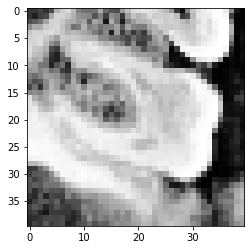

6006.0
1.0
(1, 40, 40, 40, 1)


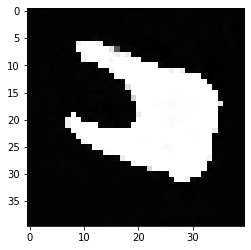

[[1. 0. 0. 0. 0.]]


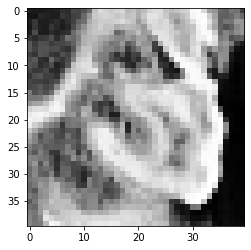

6439.0
1.0
(1, 40, 40, 40, 1)


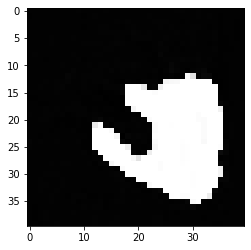

[[1. 0. 0. 0. 0.]]


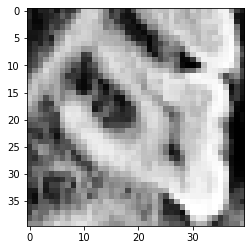

7942.0
1.0
(1, 40, 40, 40, 1)


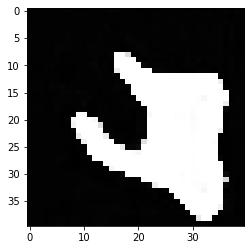

[[1. 0. 0. 0. 0.]]


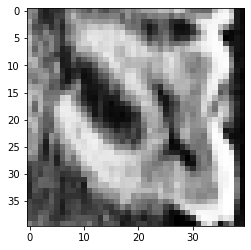

16276.0
1.0
(1, 40, 40, 40, 1)


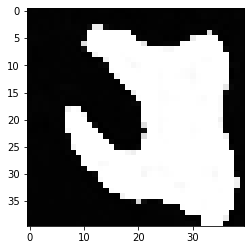

[[1. 0. 0. 0. 0.]]


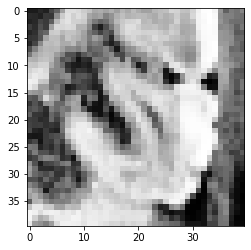

6764.0
1.0
(1, 40, 40, 40, 1)


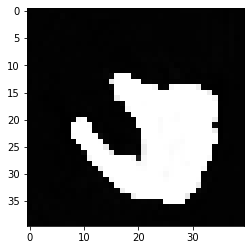

[[1. 0. 0. 0. 0.]]


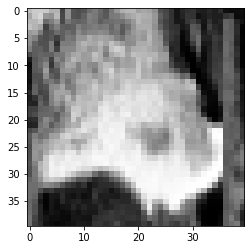

6188.0
1.0
(1, 40, 40, 40, 1)


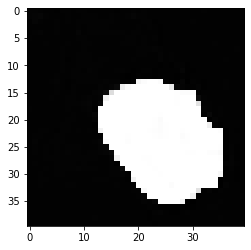

[[0. 0. 1. 0. 0.]]


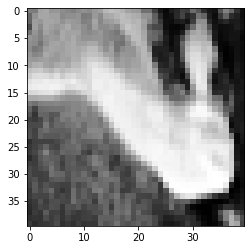

6583.0
1.0
(1, 40, 40, 40, 1)


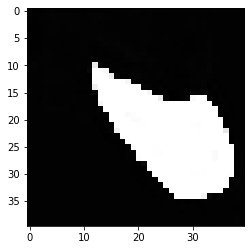

[[0. 0. 1. 0. 0.]]


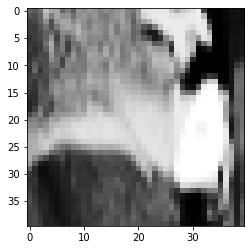

5520.0
1.0
(1, 40, 40, 40, 1)


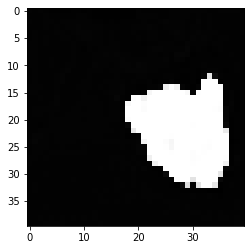

[[0. 0. 1. 0. 0.]]


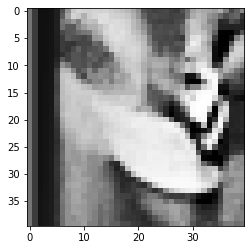

4004.0
1.0
(1, 40, 40, 40, 1)


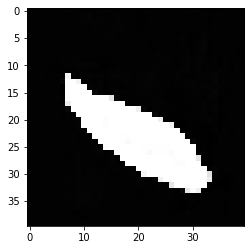

[[0. 0. 1. 0. 0.]]


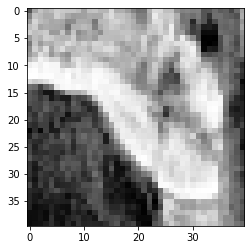

3329.0
1.0
(1, 40, 40, 40, 1)


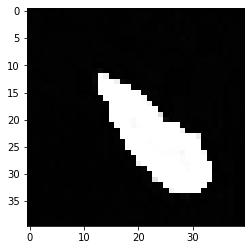

[[0. 0. 1. 0. 0.]]


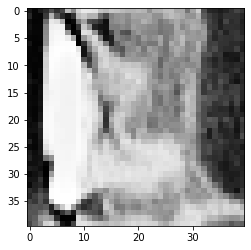

10518.0
1.0
(1, 40, 40, 40, 1)


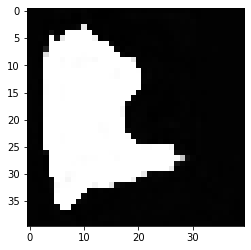

[[0. 1. 0. 0. 0.]]


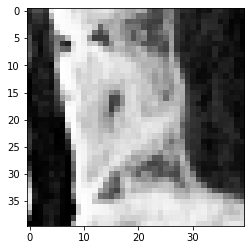

8295.0
1.0
(1, 40, 40, 40, 1)


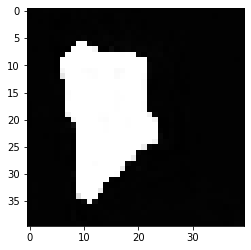

[[0. 1. 0. 0. 0.]]


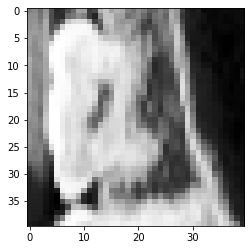

8511.0
1.0
(1, 40, 40, 40, 1)


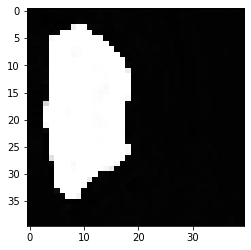

[[0. 1. 0. 0. 0.]]


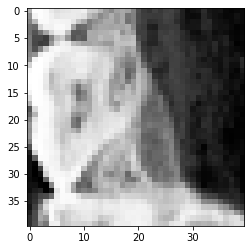

6893.0
1.0
(1, 40, 40, 40, 1)


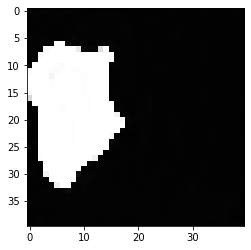

[[0. 1. 0. 0. 0.]]


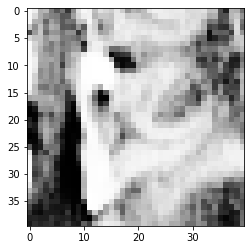

7111.0
1.0
(1, 40, 40, 40, 1)


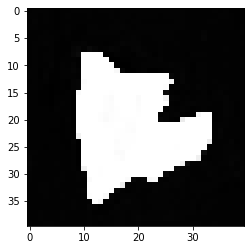

[[0. 1. 0. 0. 0.]]


In [48]:
import numpy as np
from skimage.measure import marching_cubes_lewiner
import meshplot as mp
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers] 
print(len(layer_outputs))
#model = Model(inputs=model.inputs, outputs=layer_outputs[34])

for i in np.array(inputsAll):   

    fig, (ax1) = plt.subplots(1,1)
    ax1.imshow(np.squeeze(i[20]), cmap="gray")
    plt.show()
    prediction = model.predict(tf.expand_dims(np.array([i]), axis=4))
    
    print(np.sum(np.round(prediction[0][0][:,:,:,0])))
    print(np.sum(np.round(prediction[1])))
    
    pred_mask  = resize_data(prediction[0][0][:,:,:,0], i.shape) 

    print(prediction[0].shape)
    fig, (ax1) = plt.subplots(1,1)
    ax1.imshow(np.squeeze(pred_mask[20]), cmap="gray")
    plt.show()
    #vertices,faces,_,_ = marching_cubes_lewiner(pred[:,:,20])
    print(np.round(prediction[1]))
    #mp.plot(vertices, faces, return_plot=False)
    
  #  activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
   # for l in range(len(layer_outputs)):
    c =  model.predict(tf.expand_dims(np.array([i]), axis=4))
    #print(c.shape)
   # fig, (ax1) = plt.subplots(1,1)
   # ax1.imshow(c[:,:,20], cmap="gray")
        
#print(outputs)

In [70]:
import numpy as np
from skimage.measure import marching_cubes_lewiner
import meshplot as mp
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers] 
model = Model(inputs=model.inputs, outputs=layer_outputs[12])

for i in np.array(inputsAll):   
    print(tf.expand_dims(np.array([i]), axis=4).shape)
    
    prediction = model.predict(tf.expand_dims(np.array([i]), axis=4))
   # print(np.round(prediction[1]))
    pred_mask  = resize_data(prediction[0][:,:,:,0], i.shape) 
    pred=prediction[0]
    print(pred[:,:,20].shape)
    vertices,faces,_,_ = marching_cubes_lewiner(pred[:,:,20])
    #print(np.round(prediction[1]))
    mp.plot(vertices, faces, return_plot=False)
    
  #  activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
   # for l in range(len(layer_outputs)):
    c =  model.predict(tf.expand_dims(np.array([i]), axis=4))
    #print(c.shape)
   # fig, (ax1) = plt.subplots(1,1)
   # ax1.imshow(c[:,:,20], cmap="gray")
        
#print(outputs)

(1, 40, 40, 40, 1)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.433777…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.5, 19.…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.5, 19.…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.5, 19.…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.5, 19.…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.5, 19.…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(37.303142…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.5, 19.…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.5, 19.…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(2.4255607…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.5, 19.…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.5, 19.…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.420117…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.458072…

(1, 40, 40, 40, 1)
(40, 40, 64)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(19.387106…

In [ ]:
model = load('segmentation')
train_classification(model,['mandible-Right-Molar/iteration1','mandible-Right-Molar/iteration2'])

In [ ]:

model = load('segmentation')
c_input = []
labels =[]

print(len(inputs_train)) 
training=[]
for y in range((len(inputs_train))):
    for i in (np.array(inputs_train)[y]): 
        mask = model.predict(np.array([np.expand_dims(i,3)])) 
        print(mask.shape)
        mask = mask[0][:,:, :, 0]
        mask =  np.round(resize(mask,(40,40,40)))
        image = resize(i,(40,40,40))
        print(mask.shape)
      #  fig, (ax1) = plt.subplots(1,1)
       # ax1.imshow(np.squeeze(image[20]), cmap="gray")
        
        image[mask==0] = 0
       # display_monatage(image,image)
        c_input.append(image)
        
        #training.append(image)
       # display_monatage(c_input[0],c_input[0])

    print(np.array(target_train[y]).shape)
    c = np.expand_dims(np.array(c_input),4)
    
    print(np.array(c).shape)
    #print(training.shape)
    target=np.concatenate(np.transpose(target_train),axis=-1)
   # print(target)
    training.append([c,target])
    print(np.array(training).shape)  